**Author:** Priyadharsshini Sakrapani

### GOAL

The goal of this project is to familiarise with the entire data preparation pipeline from preparing/cleaning/encoding the dataset, to fitting a supervised learning model, to finally generating some predictive analytics.

### Dataset Description

Gathered from: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset.

**Age:** Age of the patient

**Sex:** Sex of the patient

**cp:** Chest Pain type
 1. typical angina

 2.  atypical angina

 3. non-anginal pain

 4. asymptomatic
 
**trtbps:** resting blood pressure (in mm Hg)

**chol:** cholesterol in mg/dl fetched via BMI sensor

**fbs:** (fasting blood sugar > 120 mg/dl)
1. 1 = true

2. 0 = false

**rest_ecg:** resting electrocardiographic results
1. Value 0: normal

2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach:** maximum heart rate achieved

exang: exercise induced angina
1. 1 = true

2. 0 = false

**old peak:** ST depression induced by exercise relative to rest

**slp:** the slope of the peak exercise ST segment

1. 0 = unsloping

2. 1 = flat

3. 2 = downsloping

**caa:** number of major vessels (0-3)

**thall:** thalassemia

1. 0 = null

2. 1 = fixed defect

3. 2 = normal

4. 3 = reversable defect

**output:** diagnosis of heart disease (angiographic disease status)

    0: < 50% diameter narrowing. less chance of heart disease
    1: > 50% diameter narrowing. more chance of heart disease

## Task 1 - Data Cleaning

- There are 14 missing values in the 'caa' attribute. I have chosen to delete those values, as it looses data by only 0.05%  
- <b>caa: </b>  For the attribute 'caa' which represents the major number of blood vessels which is between 0 and 3, here the presence of 4 signifies the presence of outlier. Hence, I am considering the value 4 to be an outlier and removing the same(Trimming).  
- <b>chol: </b> There are outliers in the lowest and the highest range, hence using quantile based flooring and capping to remove the bottom 10% and the top 90%. The flooring and the capping value is set using domain knowledge.  
- <b>thalachh: </b> For the attribute 'thalachh' the data is heavily positively skewed and indicates the presence of vast number of outliers. Using domain knowlege, it is not possible for a human heart to go in the range of 2000 to 6000 as indicated in the box plot above. Hence capping the top 97% of the values in this attribute.  
- <b>trtbps: </b> Since the attribute 'trtbps' is not heavily skewed, replacing the outliers with 3 times the standard deviation.  
- <b>oldpeak: </b>Since the data is skewed (more than 1), replacing with 3 times the standard deviation might not be a good idea. Also, due to lack of knowledge of value to be used to trimming, capping/flooring, using IQR for the skewed data as it works well.  


In [2621]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import numpy as np
import warnings
    
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv('dataset-A.csv', index_col=0)
df_B = pd.read_csv('dataset-B.csv', index_col=0)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37.0,Male,non-anginal pain,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
3,56.0,Male,atypical angina,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
5,57.0,Male,typical angina,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
7,44.0,Male,atypical angina,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
9,57.0,Male,non-anginal pain,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59.0,Male,typical angina,164.0,176.0,1.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0,0.0
298,57.0,Female,typical angina,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,Male,asymptomatic,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,NaN,3.0,0.0
300,68.0,Male,typical angina,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0


In [2622]:
# Finding the missing values.
df.isnull().sum()

age          0
sex          0
cp           0
trtbps       0
chol         0
fbs          0
restecg      0
thalachh     0
exng         0
oldpeak      0
slp          0
caa         14
thall        0
output       0
dtype: int64

In [2623]:
# storing the missing values for furture use.
rows_to_fix = df[df.isna().any(axis=1)].copy()
rows_to_fix

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
21,44.0,Male,non-anginal pain,130.0,233.0,0.0,1.0,179.0,1.0,0.4,2.0,NaN,2.0,1.0
23,61.0,Male,non-anginal pain,150.0,243.0,1.0,1.0,137.0,1.0,1.0,1.0,NaN,2.0,1.0
66,51.0,Male,non-anginal pain,100.0,-222.0,0.0,1.0,143.0,1.0,1.2,1.0,NaN,2.0,1.0
84,42.0,Female,typical angina,102.0,265.0,0.0,0.0,122.0,0.0,0.6,1.0,NaN,2.0,1.0
91,57.0,Male,typical angina,132.0,207.0,0.0,1.0,168.0,1.0,0.0,2.0,NaN,3.0,1.0
114,55.0,Male,atypical angina,130.0,262.0,0.0,1.0,155.0,0.0,0.0,2.0,NaN,2.0,1.0
161,55.0,Female,atypical angina,132.0,342.0,0.0,1.0,166.0,0.0,1.2,2.0,NaN,2.0,1.0
224,54.0,Male,typical angina,110.0,239.0,0.0,1.0,126.0,1.0,2.8,1.0,NaN,3.0,0.0
243,57.0,Male,typical angina,152.0,274.0,0.0,1.0,88.0,1.0,1.2,1.0,NaN,3.0,0.0
257,50.0,Male,typical angina,144.0,200.0,0.0,0.0,1623.0,1.0,0.9,1.0,NaN,3.0,0.0


In [2624]:
# There are 14 missing values in the 'caa' attribute. I have chosen to delete those values, as it looses data by only 0.05%
df = df.dropna()

<AxesSubplot:>

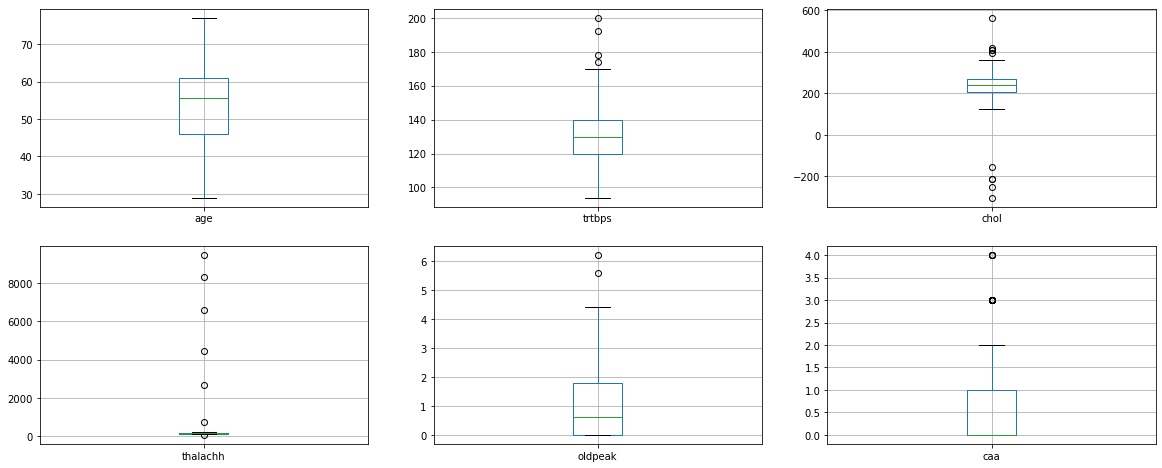

In [2625]:
# Handling outliers 
# Creating a box plot for all continuous variables

fig,axs=plt.subplots(2,3, figsize=(20, 8))
df.boxplot('age',ax=axs[0][0])
df.boxplot('trtbps',ax=axs[0][1])
df.boxplot('chol',ax=axs[0][2])
df.boxplot('thalachh',ax=axs[1][0])
df.boxplot('oldpeak',ax=axs[1][1])
df.boxplot('caa',ax=axs[1][2])


The presence of outliers can be seen in the following attribues:
- trtbps
- chol
- thalachh
- oldpeak
- caa

In [2626]:
# For the attribute 'caa' which represents the major number of blood vessels which is between 0 and 3, here the presence of 4 signifies the presence of outlier. 
# Hence, I am considering the value 4 to be an outlier and removing the same(Trimming).

df = df.loc[df['caa'] <= 3]

# removing the same outlier from datasetB
df_B = df_B.loc[df_B['caa'] <= 3]


In [2627]:
# For the attribute 'chol' there are outliers in the lowest and the highest range, hence using quantile based flooring and capping
# to remove the bottom 10% and the top 90%. The flooring and the capping value is set using domain knowledge.

# Before removing the outliers the attriute is negatively skewed with value -3.
print("Before removing outliers, the attribute is negatively skewed")
print(df['chol'].skew())

print("The Quantile values")
first = df['chol'].quantile(0.10)
second = df['chol'].quantile(0.90)
print(first)
print(second)

# Removing the outliers.
df["chol"] = np.where(df["chol"] <first, first,df['chol'])
df["chol"] = np.where(df["chol"] >second, second,df['chol'])

print("After removing the outliers, the attribute is close to normal skew")
print(df['chol'].skew())


Before removing outliers, the attribute is negatively skewed
-3.0127880347639544
The Quantile values
182.3
307.70000000000005
After removing the outliers, the attribute is close to normal skew
0.13459278307912087


197.17000000000002
-0.40834844862183833


<AxesSubplot:>

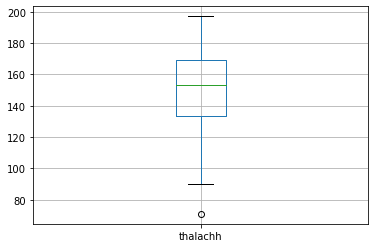

In [2628]:
# For the attribute 'thalachh' the data is heavily positively skewed and indicates the presence of vast number of outliers.

# Using domain knowlege, it is not possible for a human heart to go in the range of 2000 to 6000 as indicated in the box
# plot above. Hence capping the top 97% of the values in this attribute

val = df['thalachh'].quantile(0.97)
print(val)
df["thalachh"] = np.where(df["thalachh"] > val, val,df['thalachh'])

print(df['thalachh'].skew())
df.boxplot('thalachh')




In [2629]:
# Since the attribute 'trtbps' is not heavily skewed, replacing the outliers with 3 times the standard deviation

print("The skew value before removing outliers")
print(df['trtbps'].skew())

high_lim = df['trtbps'].mean() + 3*df['trtbps'].std()
low_lim = df['trtbps'].mean() - 3*df['trtbps'].std()
print("High-",high_lim)
print("Low-",low_lim)
df['trtbps'] = np.where(df['trtbps'] >= high_lim, high_lim, np.where(df['trtbps'] <= low_lim, low_lim, df['trtbps']))
print("The skew value after removing outliers")
print(df['trtbps'].skew())


The skew value before removing outliers
0.742122523231686
High- 181.521268780674
Low- 80.18408836218316
The skew value after removing outliers
0.5245314030410775


In [2630]:
# For the attribute 'oldpeak', since the data is skewed more than 1, replacing with 3 times the standard deviation 
# might not be a good idea. Also, due to lack of value to be used to trimming, capping/flooring, using IQR for the skewed data as it works well.

print("The skew value before removing outliers")
print(df['oldpeak'].skew())


q1=df['oldpeak'].quantile(0.25)
q3=df['oldpeak'].quantile(0.75)
iqr = q3-q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print("High:", high_lim)
print("Low:", low_lim)
df['oldpeak'] = np.where(df['oldpeak'] >= high_lim, high_lim, np.where(df['oldpeak'] <= low_lim, low_lim, df['oldpeak']))


The skew value before removing outliers
1.3413646306767326
High: 4.5
Low: -2.7


## Task 2 - Feature Engineering

The models we intend to use will only receive continuous attributes. Therefore, we must encode all necessary features. 

### Discussion

- <b>'sex': </b> Using <b>LABEL ENCODING</b> Since this attribute has just two possible values(Male and Female), using Label Encoding to convert this categorical values to continuous data. Since there are just two possible values, it will either be assigned 0 or 1, which avoids one of the problems with the algorithm of having some sort of order.

- <b>'cp': </b> Using <b>ONE-HOT ENCODING</b> Since this attribute has four possible values, using one-hot encoding to convert this categorical values to continuous data.  Since the number of values in this category is not large enough(4), using one hot encoding will not increase the data set significantly. Also using label encoding might make the algorithm to assume that it has some sort of weightage or ordering. Also since this is not an ordinal data, I do not see using ordinal encoding as the best fit either. Hence, using one-hot encoding for this variable.

In [2631]:
# Encoding the attribute 'SEX'
# Finding all possible unique values in the attribute 'sex'

df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [2632]:
# REASON TO USE LABEL ENCODING:
#Since this attribute has just two possible values(Male and Female), using Label Encoding to convert this 
#categorical values to continuous data. 

#Since there are just two possible values, it will either be assigned 0 or 1, which avoids 
#one of the problems with the algorithm of having some sort of order.

label = preprocessing.LabelEncoder() 
df['sex']= label.fit_transform(df['sex']) 
df_B['sex']= label.fit_transform(df_B['sex']) 

df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37.0,1,non-anginal pain,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
3,56.0,1,atypical angina,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
5,57.0,1,typical angina,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
7,44.0,1,atypical angina,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
9,57.0,1,non-anginal pain,150.0,182.3,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63.0,0,typical angina,124.0,197.0,0.0,1.0,136.0,1.0,0.0,1.0,0.0,2.0,0.0
297,59.0,1,typical angina,164.0,182.3,1.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0,0.0
298,57.0,0,typical angina,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
300,68.0,1,typical angina,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0


In [2633]:
# Encoding the attribute 'CP'

# Since this attribute has four possible values, using one-hot encoding to convert this categorical values
# to continuous data. 

# REASON TO USE ONE-HOT ENCODING: Since the number of values in this category is not large enough(4), using one hot encoding
# will not increase the data set significantly. Also using label encoding might make the algorithm to assume that it has 
# some sort of weightage or ordering. Also since this is not an ordinal data, I donot see using ordinal encoding as the
# best fit either. Hence, using one-hot encoding for this variable.

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() 
df_ohe = df.copy()
cp = df_ohe.cp.values

df_ohe = pd.DataFrame(encoder.fit_transform(cp.reshape(-1,1)).toarray(),index=df.index , columns=encoder.categories_[0])
df.drop('cp', axis=1, inplace=True)

df = df.join(df_ohe)
df
 

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,asymptomatic,atypical angina,non-anginal pain,typical angina
1,37.0,1,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0
3,56.0,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0
5,57.0,1,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
7,44.0,1,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0
9,57.0,1,150.0,182.3,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63.0,0,124.0,197.0,0.0,1.0,136.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
297,59.0,1,164.0,182.3,1.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
298,57.0,0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
300,68.0,1,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0


In [2634]:
# Encoding DatasetB
df_ohe_B = df_B.copy()
cp_B = df_ohe_B.cp.values

df_ohe_B = pd.DataFrame(encoder.fit_transform(cp_B.reshape(-1,1)).toarray(),index=df_B.index , columns=encoder.categories_[0])
df_B.drop('cp', axis=1, inplace=True)

df_B = df_B.join(df_ohe_B)


## Task 3 - Scale the Data  

### Discussion

- <b>Min-max Scaling: </b> Since the dataset is not heavily skewed(after outlier removal), also that the attributes that needs scaling does not have a normal distribution and we have cleaned the data by removing most of the outlier. And since most of our attributes are in the smaller range, and this scales our data in the 0-1 range , it makes it more comparable. Hence, min-max scalar seems to be a good fit. 
-<b> Effect of Min-max Scaling: </b> The min-max scalar has distributed the data within the range 0 and 1 and has not affected the shape of the data. The effect has not been distoring to the original dataset.

- <b> Robust Scaling: </b> Since all the attributes do not have a normal distribution (eg:'thalachh'). Also since this scaling is prone to outliers, in our dataset, the attribute 'thalach' even after data cleaning shows the presence of an extreme case which necessarily need not be an outlier but just a rare scenario. 

- <b> Effect of Robust Scaling: </b> Although there is still an outlier present in the 'thalach' which could be a rare occurance, the scaling has not been affected by it. The Density plot remains the same for both the raw data and the transformed data. It has not affected the skeweness of the data. The values have also been scaled to a comparable range that is comparable with other attributes.

- <b> Quantile Transformer: </b> Since our data has uniform modal and close to bimodal in the attributes 'thalachh' and 'oldpeak'

- <b> Effect of Quantile Transformer: </b> It has transformed the attributes 'age', 'thalachh' and 'trtbps' to have close to normal distribution. The attribute 'oldpeak' is close to being a bimodel. All the values have been transformed to have range between -5 and 5.


In [2635]:
stats = ['mean', 'median', 'std', 'var']
agg_dict = {'age': stats, 'trtbps': stats, 'chol': stats, 'oldpeak': stats, 'thalachh': stats}
desc_stats = df.agg(agg_dict)
desc_stats

,age,trtbps,chol,oldpeak,thalachh
mean,54.375000,130.723404,242.834821,1.024107,150.777634
median,56.000000,130.000000,240.500000,0.600000,153.500000
std,9.424826,16.433404,40.290216,1.166209,24.645250
var,88.827354,270.056771,1623.301473,1.360044,607.388369


In [2636]:
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler


def plot_histograms_density(df, columns, df_transformed, fig_title):
    fig, axs = plt.subplots(len(columns),2,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        df[c].hist(ax=axs[i], density=True) # normalizes the density
        df[c].plot.density(ax=axs[i], title=c)
        df_transformed[c].hist(ax=axs[i+1], density=True, stacked=True) # normalizes the density
        df_transformed[c].plot.density(ax=axs[i+1], title=str(c+'_transformed'))
        i+=2
        
val_cols_names = ['trtbps','chol','thalachh','age','oldpeak']



In [2637]:
# Since the attributes 'age', 'trtbps', 'chol', 'thalachh', 'oldpeak' have higher magnitudes and range than the other attributes, it 
# is important to scale these attributes.

In [2638]:
#Effect: The values have been transformed to a small magnitude that is comparable with the other attributes.

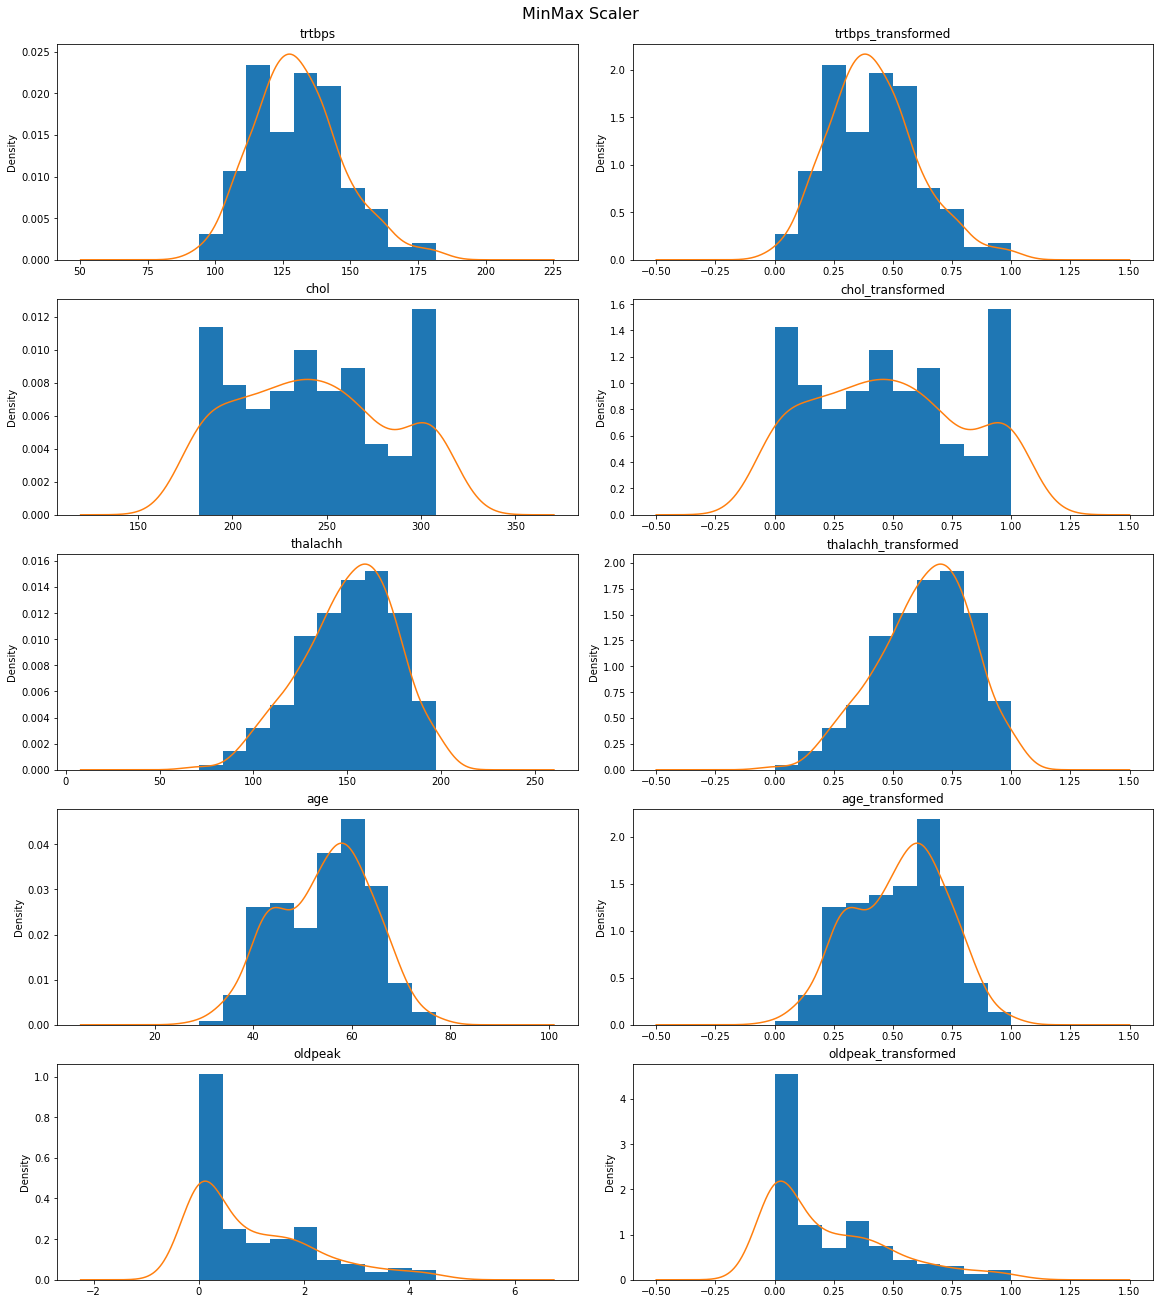

In [2639]:
# Min-max Scaling: Since the dataset is not heavily skewed(after outlier removal), also that the attributes that 
# needs scaling does not have a normal distribution and also we have cleaned the data by
# removing most of the outlier. And also since most of our attributes are in the smaller range, and since this
# also scales our data in the 0-1 range , it makes it more comparable. Hence, min-max scalar seems to be a good fit. 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scale = df.drop(['output'], axis=1)
min_max_df = scaler.fit_transform(df_scale)
min_max_df = pd.DataFrame(min_max_df, index=df_scale.index, columns=df_scale.columns)
plot_histograms_density(df_scale, val_cols_names, min_max_df, 'MinMax Scaler')

In [2640]:
# Effect: The min-max scalar has distributd the data within the range 0 and 1 and has not affected the shape of the data
# The effect has not been distoring to the original dataset.

          age  sex  trtbps      chol  fbs  restecg  thalachh  exng   oldpeak  \
1   -1.333333  0.0     0.0  0.153226  0.0      1.0  0.943662   0.0  1.611111   
3    0.000000  0.0    -0.5 -0.072581  0.0      1.0  0.690141   0.0  0.111111   
5    0.070175  0.0     0.5 -0.782258  0.0      1.0 -0.154930   0.0 -0.111111   
7   -0.842105  0.0    -0.5  0.362903  0.0      1.0  0.549296   0.0 -0.333333   
9    0.070175  0.0     1.0 -0.938710  0.0      1.0  0.577465   0.0  0.555556   
..        ...  ...     ...       ...  ...      ...       ...   ...       ...   
296  0.491228 -1.0    -0.3 -0.701613  0.0      1.0 -0.492958   1.0 -0.333333   
297  0.210526  0.0     1.7 -0.938710  1.0      0.0 -1.788732   0.0  0.222222   
298  0.070175 -1.0     0.5  0.008065  0.0      1.0 -0.859155   1.0 -0.222222   
300  0.842105  0.0     0.7 -0.766129  1.0      1.0 -0.352113   0.0  1.555556   
302  0.070175 -1.0     0.0 -0.072581  0.0      0.0  0.577465   0.0 -0.333333   

     slp  caa  thall  asymptomatic  aty

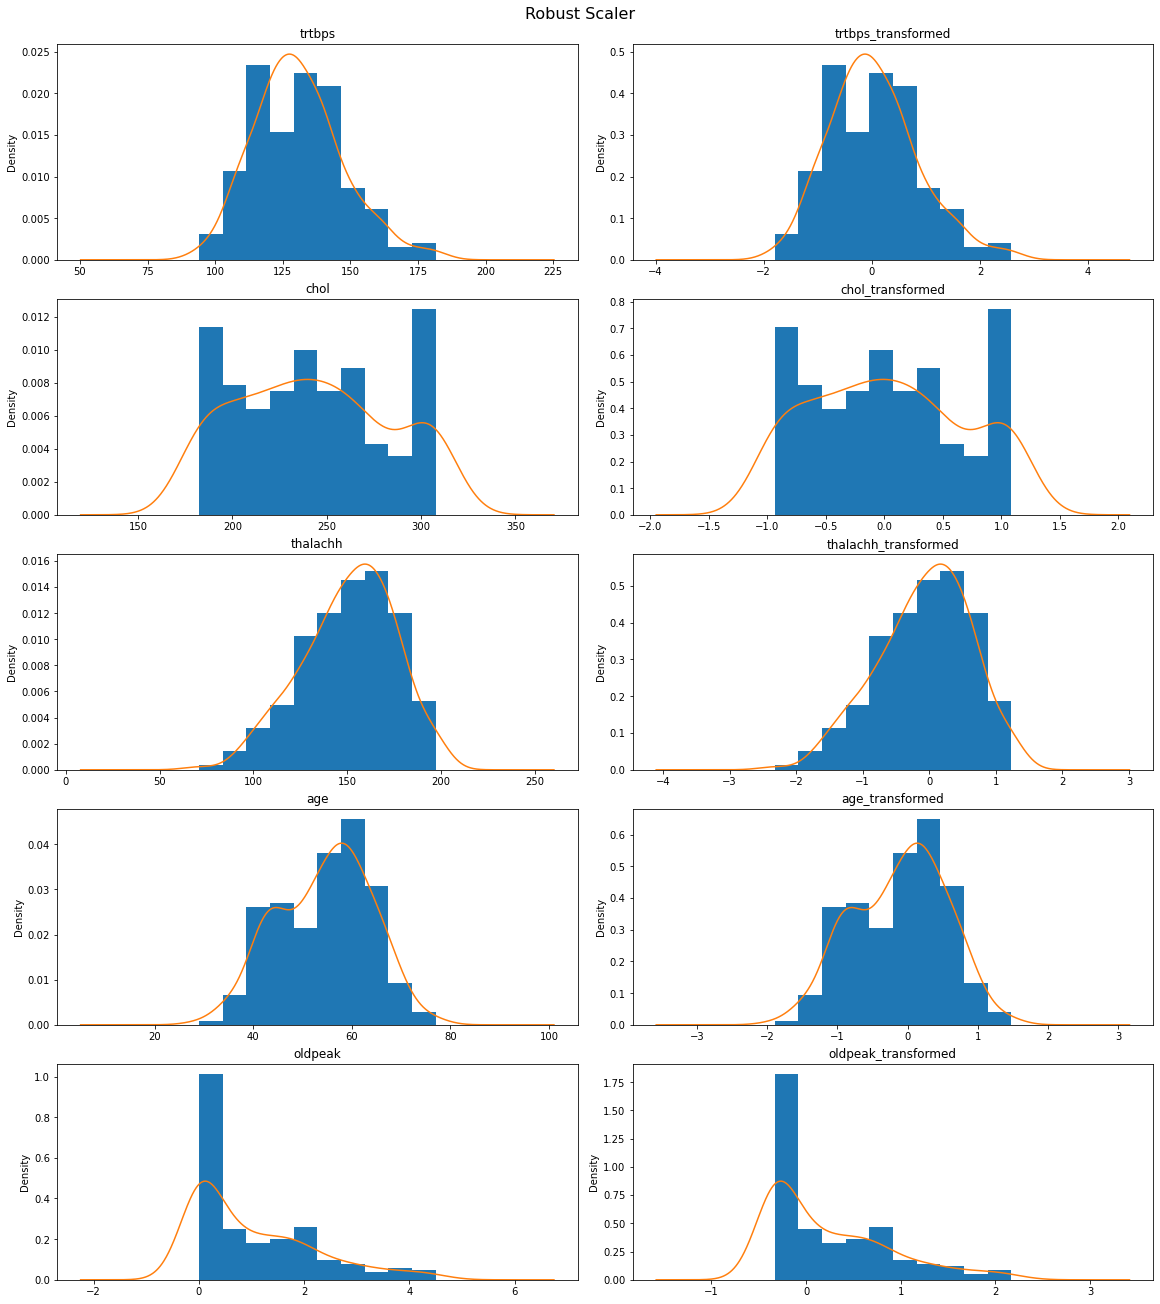

In [2655]:
# Robust Scaling: 
# - Since all the attributes do not have a normal distribution (eg:'thalachh')
# - Since this scaling is prone to outliers, in our dataset, the attribute 'thalach' even after data cleaning
# shows the presence of an extreme case which necessarily need not be an outlier but just a rare scenario. 

from sklearn.preprocessing import RobustScaler
# transform the data
scaler = RobustScaler()
robust_tdf = scaler.fit_transform(df_scale)
robust_tdf = pd.DataFrame(robust_tdf, index=df_scale.index, columns=df_scale.columns)
print(robust_tdf)
plot_histograms_density(df_scale, val_cols_names, robust_tdf, 'Robust Scaler')

In [2642]:
# Effect: Although there is still an outlier present in the 'thalach' which could be a rare occurance, the scaling has not been
# affected by it. The Density plot remains the same for both the raw data and the transformed data. It has not affected
# the skeweness of the data. The values have also been scaled to a comparable range that is comparable with other attributes.

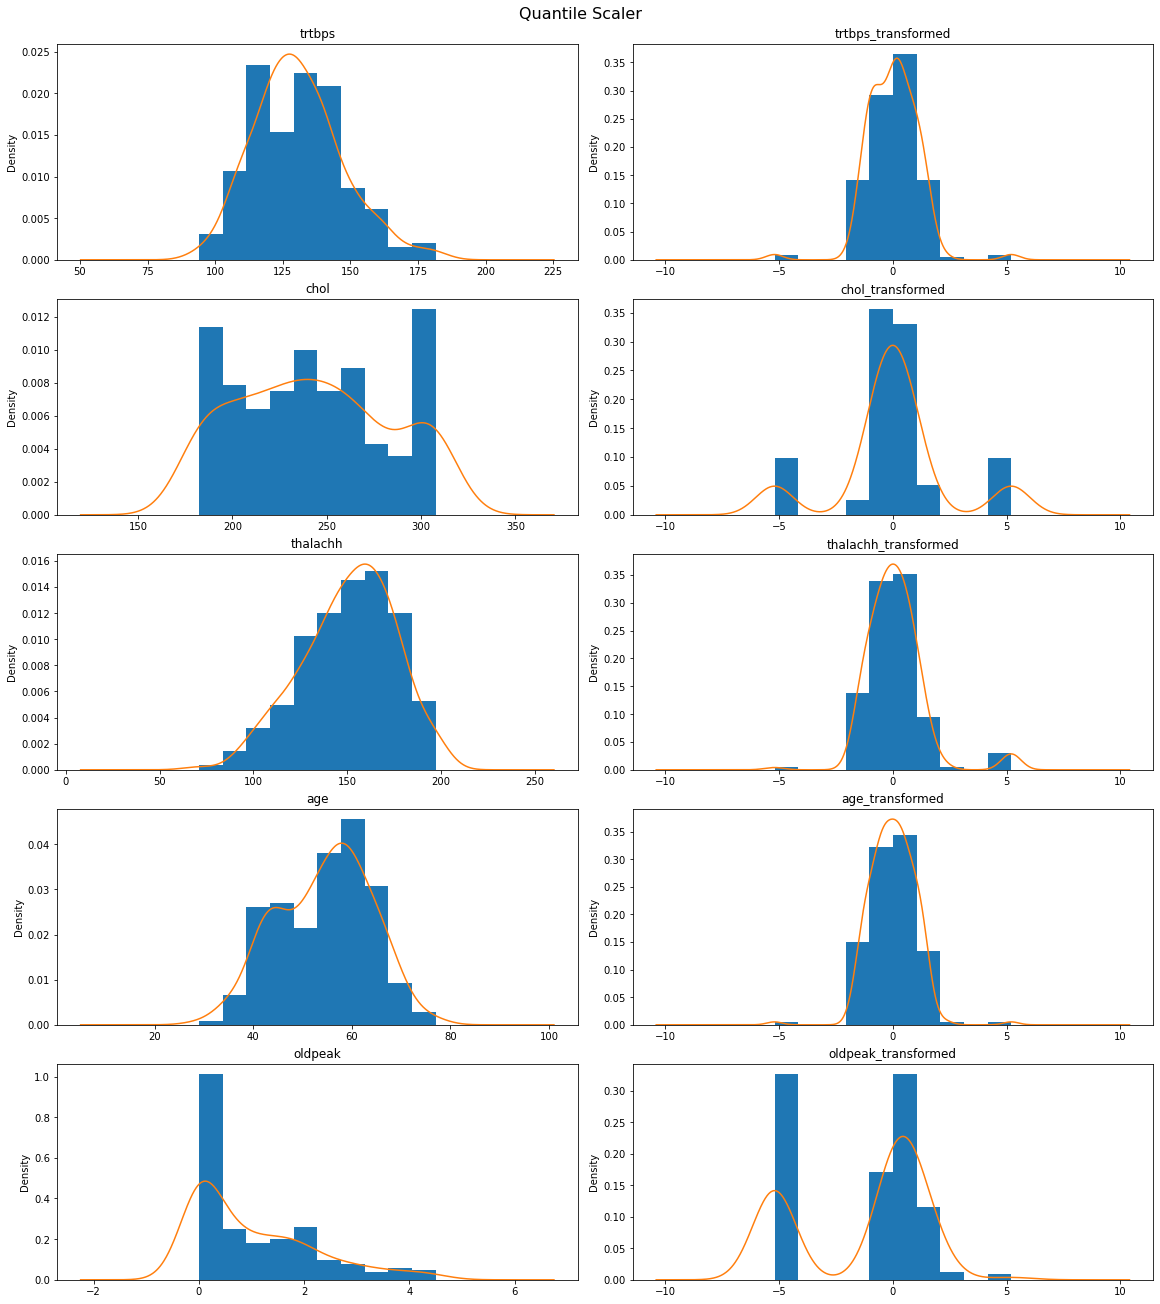

In [2643]:
# since our data has uniform modal and close to bimodal in the attributes 'thalachh' and 'oldpeak'
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')

Quantile_transformer = scaler.fit_transform(df_scale)
Quantile_transformer = pd.DataFrame(Quantile_transformer, index=df_scale.index, columns=df_scale.columns)

plot_histograms_density(df_scale, val_cols_names, Quantile_transformer, 'Quantile Scaler')

In [ ]:
#EFFECT OF QUANTILE TRANSFORMATION:
#It has transformed the attributes 'age', 'thalachh' and 'trtbps' to have close to normal distribution.
#The attribute 'oldpeak' is close to being a bimodel. 
#All the values have been transformed to have range between -5 and 5.

## Task 4 - Model Training and Testing (20 Marks)

Split our dataset for a training/ testing setup. In the training step we  generate 30 estimates per classifier for having some confidence.


I have used the following algorithms 
- KNN Classifier
- Support Vector Machine
- Linear Classifier

I have used the split and repeat in the <b>'RepeatedKFold'</b> to generate 30 estimates. I am using <b>'F-score'</b> to get the performance metric as it is a great way to <b>evaluate binary classification</b>. Another reason to use 'F-Score'is that in scenarios of disease diagonisis there is a much more <b>probability for the data to be imbalanced</b> and 'F-Score' performs good in such cases, better than accuracy and confusion matrix.

<b> with respect to our dataset </b>
Since in the output the number of 1s are much more than the number of 0s , which is close to an imbalanced data, 'F-Score' will perform better in such scenarios.


In [2645]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_quantile, y_quantile, test_size=0.20, random_state=0, stratify=y)


In [2646]:
# Applying KNN Classifier algorithm on the data scaled in the previous task 

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


model = KNeighborsClassifier(n_neighbors=3)
cv = RepeatedKFold(n_splits=10, n_repeats=3)

# y is output that we want to forecast
y = df['output'].to_numpy()

# 'Min_Max' Scaled data
# X is all the other variables except the 'output'
X_min_max = min_max_df.to_numpy()
KNN_Min_Max_Scores = cross_val_score(model, X_min_max, y, scoring='f1_weighted', cv=cv, n_jobs=-1)


# 'Robust scaled' data
# X is all the other variables except the 'output'
X_robust = robust_tdf.to_numpy()
# y is output that we want to forecast
KNN_Robust_Scores = cross_val_score(model, X_robust, y, scoring='f1_weighted', cv=cv, n_jobs=-1)

# 'Quantile Transformed' data
X_quantile = Quantile_transformer.to_numpy()
X_quantile = X_quantile.astype('int')
# y is output that we want to forecast
y_quantile = df['output'].to_numpy()
y_quantile = y.astype('int')
KNN_Quantile_Scores = cross_val_score(model, X_quantile, y_quantile, scoring='f1_weighted', cv=cv, n_jobs=-1)

# Raw Data
X_Raw = df.drop(['output'], axis=1).to_numpy()
y_Raw = df['output'].to_numpy()
KNN_raw_scores = cross_val_score(model, X_Raw, y_Raw, scoring='f1_weighted', cv=cv, n_jobs=-1)

In [2647]:
# Using Linear Classifier algorithm on the scaled data on previous task

lin_model = SGDClassifier(loss="squared_error", penalty="l2", max_iter=500)
cv = RepeatedKFold(n_splits=10, n_repeats=3)

# y is output that we want to forecast
y = df['output'].to_numpy()

#'Min_Max' Scaled data
# X is all the other variables except the 'output'
X_min_max = min_max_df.to_numpy()
Linear_Min_Max_Scores = cross_val_score(lin_model, X_min_max, y, scoring='f1_weighted', cv=cv, n_jobs=-1)


#'Robust scaled' data
# X is all the other variables except the 'output'
X_robust = robust_tdf.to_numpy()
Linear_Robust_Scores = cross_val_score(lin_model, X_robust, y, scoring='f1_weighted', cv=cv, n_jobs=-1)


# 'Quantile Transformed' data
X_quantile = Quantile_transformer.to_numpy()
X_quantile = X_quantile.astype('int')
y_quantile = y_quantile.astype('int')
Linear_Quantile_Scores = cross_val_score(lin_model, X_quantile, y_quantile, scoring='f1_weighted', cv=cv, n_jobs=-1)

#Raw data
X_Raw = df.drop(['output'], axis=1).to_numpy()
y_Raw = df['output'].to_numpy()
Linear_raw_scores = cross_val_score(lin_model, X_Raw, y_Raw, scoring='f1_weighted', cv=cv, n_jobs=-1)

In [2648]:
# Applying Support Vector Machine on the 3 scaled data.
from sklearn.svm import SVC
svc = SVC()
cv = RepeatedKFold(n_splits=10, n_repeats=3)


# y is output that we want to forecast
y = df['output'].to_numpy()

#'Min-Max' Scaled data.
# X is all the other variables except the 'output'
X_min_max = min_max_df.to_numpy()
SVC_Min_Max_Scores = cross_val_score(svc, X_min_max, y, scoring='f1_weighted', cv=cv, n_jobs=-1)


#'Robust' Scaled data
# X is all the other variables except the 'output'
X_robust = robust_tdf.to_numpy()
SVC_Robust_Scores = cross_val_score(svc, X_robust, y, scoring='f1_weighted', cv=cv, n_jobs=-1)


#'Quantile Transformed' data
X_quantile = Quantile_transformer.astype('int')
# y is output that we want to forecast
y_quantile = y.astype('int')
SVC_Quantile_Scores = cross_val_score(svc, X_quantile, y_quantile, scoring='f1_weighted', cv=cv, n_jobs=-1)

#Raw Data
X_Raw = df.drop(['output'], axis=1).to_numpy()
y_Raw = df['output'].to_numpy()
SVC_raw_scores = cross_val_score(svc, X_Raw, y_Raw, scoring='f1_weighted', cv=cv, n_jobs=-1)

## Task 5 - Plot Training Accuracy 

- The Scaling techniques have improved the performace of the KNN algorithm by over 20%.
- For our dataset Robust scaling performs well with KNN algorithm with an avg performace of 83%.
- 'Min-Max' scaling as well as the quantile scaling with KNN algorithm performs better than the Linear classifier.
- There has not been much imporvement in the performance of the Linear classifier even with the scaling technqiues used.
- The variance when using the 'Min_Max' and 'Robust scaling' has increased a bit when using Linear classifier.
- The SVC performs better than all the other algoirthms.
- The performance with the scaling has been improved drasticaly by more than 20%. 
- SVC with Quantile_scalling gives the best result overall with an accuracy of over 85%.
- The F-score for the best model has no big variance which means we are confident that this will perform better.

<b> Best model chosen:</b> SVM + Quantile scaling with an 'F-score' of over 86%

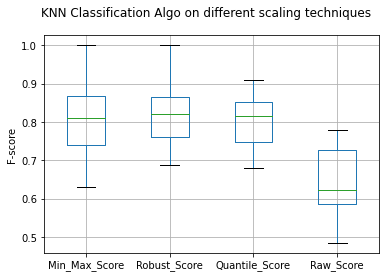

In [2649]:
# KNN Outcomes with 3 sclaing
df_outcomes1 = pd.DataFrame(KNN_Min_Max_Scores)
df_outcomes1['Robust'] = KNN_Robust_Scores
df_outcomes1['Quantile_score'] = KNN_Quantile_Scores
df_outcomes1['Raw_score'] = KNN_raw_scores
df_outcomes1.columns = ['Min_Max_Score', 'Robust_Score', 'Quantile_Score', 'Raw_Score']

boxplot = df_outcomes1.boxplot() 
boxplot.set_ylabel('F-score')
plt.suptitle('KNN Classification Algo on different scaling techniques')
plt.show()


<b>DISCUSSION:</b>
- The Scaling techniques have improved the performace of the KNN algorithm by over 20%. 
- For our dataset Robust scaling performs well with KNN algorithm with an avg performace of 83%.
- 'Min-Max' scaling as well as the quantile scaling with KNN algorithm performs better than the Linear classifier.

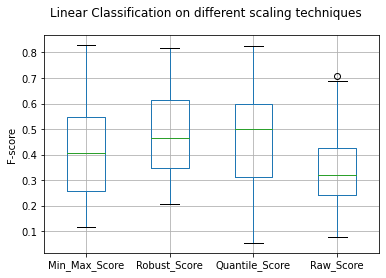

In [2650]:
# Linear classifier algorithm with 3 scaled data
df_outcomes = pd.DataFrame(Linear_Min_Max_Scores)
df_outcomes['Robust'] = Linear_Robust_Scores
df_outcomes['Quantile_score'] = Linear_Quantile_Scores
df_outcomes['Raw_score'] = Linear_raw_scores
df_outcomes.columns = ['Min_Max_Score', 'Robust_Score','Quantile_Score', 'Raw_Score']

boxplot = df_outcomes.boxplot() 
boxplot.set_ylabel('F-score')
plt.suptitle('Linear Classification on different scaling techniques')
plt.show()

<b>DISCUSSION:</b>
- There has not been much imporvement in the performance of the Linear classifier even with the scaling technqiues used.
- The variance when using the 'Min_Max' and 'Robust scaling' has increased a bit. 

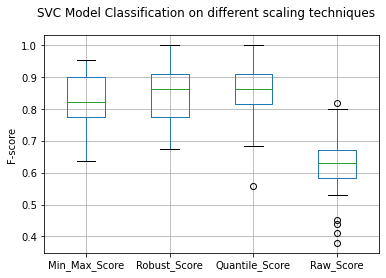

In [2651]:
#Support Vector Machine outcomes on the 3 Scaled data.
df_outcomes = pd.DataFrame(SVC_Min_Max_Scores)
df_outcomes['Robust'] = SVC_Robust_Scores
df_outcomes['Quantile_Score'] = SVC_Quantile_Scores
df_outcomes['Raw_score'] = SVC_raw_scores
df_outcomes.columns = ['Min_Max_Score', 'Robust_Score', 'Quantile_Score', 'Raw_Score']

boxplot = df_outcomes.boxplot() 
boxplot.set_ylabel('F-score')
plt.suptitle('SVC Model Classification on different scaling techniques')
plt.show()


<b>DISCUSSION:</b>
- The SVC performs better than all the other algoirthms.
- The performance with the scaling has been improved drasticaly by more than 20%. 
- SVC with Quantile_scalling gives the best result overall with an accuracy of over 85%.
- The F-score for the best model has no big variance which means we are confident that this will perform better.

## Task 6 - Output Test Prediction


In [2653]:
# Training the model
svc.fit(X_train, y_train)

# Testing the model
predictions = svc.predict(X_test)

# Scale Dataset B
scaler = QuantileTransformer()
quantile_tdf_B = scaler.fit_transform(df_B)
quantile_tdf_B = pd.DataFrame(quantile_tdf_B, index=df_B.index, columns=df_B.columns)

# Predicting the output on the datasetB
test_output = svc.predict(quantile_tdf_B)
print(test_output)

[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0]


## Task 7 - Best Test Accuracy

Imporving the accuracy if the model with hyper parameter tuning etc



In [2654]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': range(1,100),  
              'gamma': np.arange(1e-4,1e-2,0.0001), 
              'gamma':['scale', 'auto'],
              'kernel': ['poly', 'rbf', 'sigmoid'],
              'decision_function_shape':['ovo', 'ovr']}
cv = RepeatedKFold(n_splits=5, n_repeats=4, random_state=5)

grid = GridSearchCV(SVC(), param_grid, cv = cv, verbose = True, n_jobs=-1)

grid.fit(X_train,y_train)

grid_predictions = grid.predict(X_test)
print ("Score:", grid.score(X_test, y_test))


# Scale Dataset B
scaler = QuantileTransformer()
quantile_tdf_B = scaler.fit_transform(df_B)
quantile_tdf_B = pd.DataFrame(quantile_tdf_B, index=df_B.index, columns=df_B.columns)

improved_output = grid.predict(quantile_tdf_B)
print(test_output)


Fitting 20 folds for each of 1188 candidates, totalling 23760 fits
Score: 0.8888888888888888
[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0]


<b> DISCUSSION: </b> Using hyperparameter combination, I have improved the model test accuracy by 88% which is a 1% increase from the previous model. The upper bound of the model is about 98% which is also about 2% increase from the previous model.